## 4. Sistema de Monitoramento de Qualidade do Ar Meteorológica
## Desenvolva um sistema que correlaciona qualidade do ar com condições meteorológicas:
* Integre dados de poluentes (PM2.5, PM10, O3, NO2) com variáveis meteorológicas
* Implemente modelos de dispersão atmosférica simplificados (Gaussian Plume)
* Calcule índices de qualidade do ar e identifique episódios críticos
* Gere dashboards interativos, alertas automáticos e relatórios de saúde pública

## Dependencias

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


## Modelo

=== Sistema de Monitoramento de Qualidade do Ar ===

Gerando dados de exemplo...
Identificando episódios críticos...
Episódios críticos identificados: 18

Episódios Críticos:
- 2025-05-31 00:32: AQI 163 (Insalubre)
- 2025-05-31 15:32: AQI 500 (Perigoso)
- 2025-06-01 01:32: AQI 168 (Insalubre)
- 2025-06-01 23:32: AQI 165 (Insalubre)
- 2025-06-02 22:32: AQI 500 (Perigoso)

Gerando relatório de saúde pública...

=== RELATÓRIO DE SAÚDE PÚBLICA ===
Período: 2025-05-30 a 2025-06-06
AQI Médio: 102.6
AQI Máximo: 500
Poluente Dominante: PM2.5
Episódios Críticos: 18

Recomendações:
- Grupos sensíveis devem evitar atividades ao ar livre prolongadas
- Foram identificados episódios críticos de poluição
- Recomenda-se uso de máscaras em ambientes externos

=== MODELO DE DISPERSÃO GAUSSIANA ===
Fonte: 1000 g/s, Vento: 3 m/s, Direção: 45°
Concentrações calculadas:
Ponto 1 (100, 0, 2m): 1.04e-30 g/m³
Ponto 2 (500, 100, 2m): 3.90e-20 g/m³
Ponto 3 (1000, -200, 2m): 3.72e-101 g/m³

=== SISTEMA DE ALERTAS 

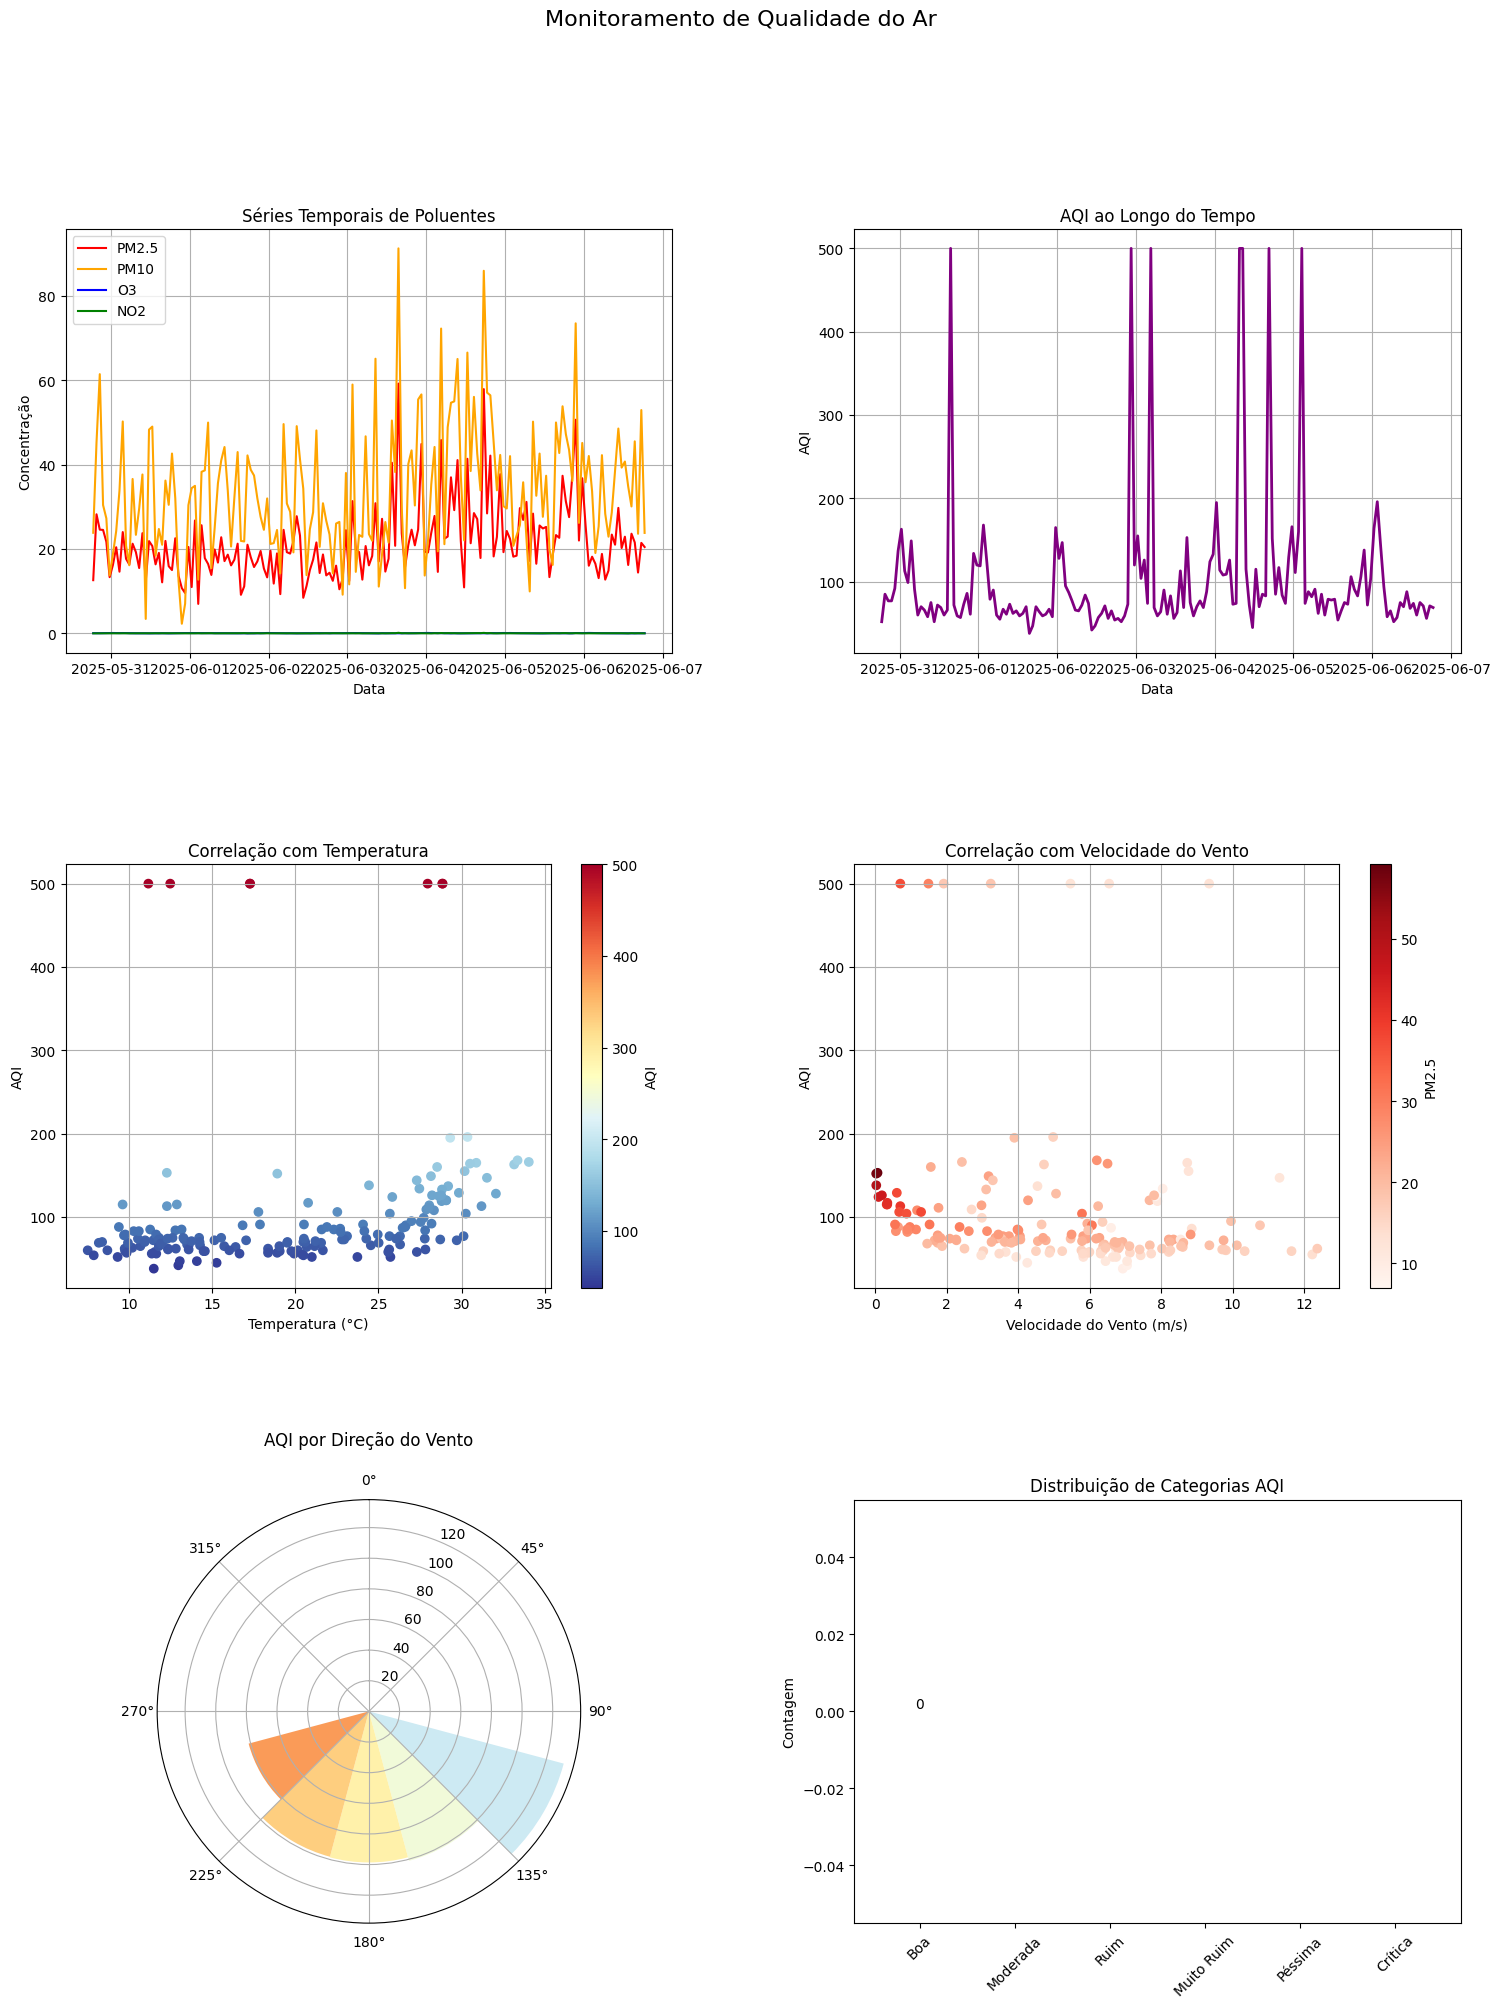

Plots estáticos salvos como air_quality_plots.png


<Figure size 640x480 with 0 Axes>

Plots estáticos salvos como air_quality_plots.png


<Figure size 640x480 with 0 Axes>

Plots estáticos salvos como air_quality_plots.png


<Figure size 640x480 with 0 Axes>

Plots estáticos salvos como air_quality_plots.png


<Figure size 640x480 with 0 Axes>

Plots estáticos salvos como air_quality_plots.png


<Figure size 640x480 with 0 Axes>

Plots estáticos salvos como air_quality_plots.png

Gerando dashboard interativo...
Dashboard salvo como dashboard.html
Ocorreu um erro: Mime type rendering requires nbformat>=4.2.0 but it is not installed


In [ ]:
class AirQualityMonitor:
    def __init__(self):
        """Sistema de Monitoramento de Qualidade do Ar com Correlação Meteorológica"""
        
        # Padrões da EPA para Índice de Qualidade do Ar (AQI)
        self.aqi_breakpoints = {
            'PM2.5': [
                (0, 12.0, 0, 50),      # Bom
                (12.1, 35.4, 51, 100), # Moderado
                (35.5, 55.4, 101, 150), # Insalubre para grupos sensíveis
                (55.5, 150.4, 151, 200), # Insalubre
                (150.5, 250.4, 201, 300), # Muito insalubre
                (250.5, 500.4, 301, 500)  # Perigoso
            ],
            'PM10': [
                (0, 54, 0, 50),
                (55, 154, 51, 100),
                (155, 254, 101, 150),
                (255, 354, 151, 200),
                (355, 424, 201, 300),
                (425, 604, 301, 500)
            ],
            'O3': [
                (0, 0.054, 0, 50),
                (0.055, 0.070, 51, 100),
                (0.071, 0.085, 101, 150),
                (0.086, 0.105, 151, 200),
                (0.106, 0.200, 201, 300),
                (0.201, 0.604, 301, 500)
            ],
            'NO2': [
                (0, 0.053, 0, 50),
                (0.054, 0.100, 51, 100),
                (0.101, 0.360, 101, 150),
                (0.361, 0.649, 151, 200),
                (0.650, 1.249, 201, 300),
                (1.250, 2.049, 301, 500)
            ]
        }
        
        # Categorias de qualidade do ar
        self.aqi_categories = {
            (0, 50): ('Bom', 'green'),
            (51, 100): ('Moderado', 'yellow'),
            (101, 150): ('Insalubre para Grupos Sensíveis', 'orange'),
            (151, 200): ('Insalubre', 'red'),
            (201, 300): ('Muito Insalubre', 'purple'),
            (301, 500): ('Perigoso', 'maroon')
        }
    
    def generate_sample_data(self, days=30):
        """Gera dados sintéticos de qualidade do ar e meteorologia"""
        
        np.random.seed(42)
        dates = pd.date_range(start=datetime.now() - timedelta(days=days), 
                             end=datetime.now(), freq='H')
        
        n_points = len(dates)
        
        # Dados meteorológicos
        temperature = 20 + 10 * np.sin(np.arange(n_points) * 2 * np.pi / 24) + np.random.normal(0, 2, n_points)
        humidity = 60 + 20 * np.sin(np.arange(n_points) * 2 * np.pi / 24 + np.pi) + np.random.normal(0, 5, n_points)
        wind_speed = np.abs(5 + 3 * np.sin(np.arange(n_points) * 2 * np.pi / 168) + np.random.normal(0, 2, n_points))
        wind_direction = (180 + 60 * np.sin(np.arange(n_points) * 2 * np.pi / 168)) % 360
        pressure = 1013 + 10 * np.sin(np.arange(n_points) * 2 * np.pi / 168) + np.random.normal(0, 3, n_points)
        
        # Efeito da inversão térmica (pior qualidade do ar com baixa velocidade do vento)
        inversion_factor = 1 / (wind_speed + 0.5)
        
        # Dados de poluentes (correlacionados com condições meteorológicas)
        pm25 = np.abs(15 + 20 * inversion_factor + np.random.normal(0, 5, n_points))
        pm10 = pm25 * 1.5 + np.random.normal(0, 10, n_points)
        
        # O3 correlacionado com temperatura e radiação solar
        solar_factor = np.maximum(0, np.sin(np.arange(n_points) * 2 * np.pi / 24))
        o3 = 0.03 + 0.05 * (temperature / 30) * solar_factor + np.random.normal(0, 0.01, n_points)
        o3 = np.maximum(0, o3)
        
        # NO2 correlacionado com tráfego (picos nas horas de pico)
        traffic_factor = 1 + 0.5 * (np.sin((np.arange(n_points) % 24 - 8) * np.pi / 6) + 
                                   np.sin((np.arange(n_points) % 24 - 18) * np.pi / 6))
        no2 = 0.02 + 0.03 * traffic_factor * inversion_factor + np.random.normal(0, 0.01, n_points)
        no2 = np.maximum(0, no2)
        
        # Criação do DataFrame
        data = pd.DataFrame({
            'datetime': dates,
            'temperature': temperature,
            'humidity': np.clip(humidity, 0, 100),
            'wind_speed': wind_speed,
            'wind_direction': wind_direction,
            'pressure': pressure,
            'PM2.5': np.maximum(0, pm25),
            'PM10': np.maximum(0, pm10),
            'O3': o3,
            'NO2': no2
        })
        
        return data
    
    def calculate_aqi(self, pollutant, concentration):
        """Calcula o Índice de Qualidade do Ar (AQI) para um poluente"""
        
        if pollutant not in self.aqi_breakpoints:
            return np.nan
        
        breakpoints = self.aqi_breakpoints[pollutant]
        
        for bp_lo, bp_hi, aqi_lo, aqi_hi in breakpoints:
            if bp_lo <= concentration <= bp_hi:
                aqi = ((aqi_hi - aqi_lo) / (bp_hi - bp_lo)) * (concentration - bp_lo) + aqi_lo
                return round(aqi)
        
        return 500  # Acima do limite máximo
    
    def get_aqi_category(self, aqi_value):
        """Retorna a categoria e cor do AQI"""
        for (min_val, max_val), (category, color) in self.aqi_categories.items():
            if min_val <= aqi_value <= max_val:
                return category, color
        return 'Perigoso', 'maroon'
    
    def gaussian_plume_model(self, x, y, z, source_strength, wind_speed, wind_direction, 
                           stability_class='D', stack_height=10):
        """
        Modelo Gaussiano de Dispersão Atmosférica Simplificado
        
        Parameters:
        - x, y, z: coordenadas do receptor
        - source_strength: taxa de emissão (g/s)
        - wind_speed: velocidade do vento (m/s)
        - wind_direction: direção do vento (graus)
        - stability_class: classe de estabilidade atmosférica (A-F)
        - stack_height: altura da chaminé (m)
        """
        
        # Parâmetros de dispersão por classe de estabilidade
        stability_params = {
            'A': {'a': 0.527, 'b': 0.865, 'c': 0.28, 'd': 0.90},  # Muito instável
            'B': {'a': 0.371, 'b': 0.866, 'c': 0.23, 'd': 0.85},  # Moderadamente instável
            'C': {'a': 0.209, 'b': 0.897, 'c': 0.22, 'd': 0.80},  # Levemente instável
            'D': {'a': 0.128, 'b': 0.905, 'c': 0.20, 'd': 0.76},  # Neutro
            'E': {'a': 0.098, 'b': 0.902, 'c': 0.15, 'd': 0.73},  # Moderadamente estável
            'F': {'a': 0.065, 'b': 0.902, 'c': 0.12, 'd': 0.67}   # Muito estável
        }
        
        params = stability_params.get(stability_class, stability_params['D'])
        
        # Transformação de coordenadas para sistema de vento
        wind_rad = np.radians(wind_direction)
        x_wind = x * np.cos(wind_rad) + y * np.sin(wind_rad)
        y_wind = -x * np.sin(wind_rad) + y * np.cos(wind_rad)
        
        # Evita divisão por zero
        if x_wind <= 0:
            return 0
        
        # Cálculo dos parâmetros de dispersão
        sigma_y = params['a'] * x_wind ** params['b']
        sigma_z = params['c'] * x_wind ** params['d']
        
        # Evita valores muito pequenos
        sigma_y = max(sigma_y, 0.1)
        sigma_z = max(sigma_z, 0.1)
        wind_speed = max(wind_speed, 0.5)
        
        # Modelo Gaussiano
        try:
            term1 = source_strength / (2 * np.pi * wind_speed * sigma_y * sigma_z)
            term2 = np.exp(-0.5 * (y_wind / sigma_y) ** 2)
            term3 = np.exp(-0.5 * ((z - stack_height) / sigma_z) ** 2)
            term4 = np.exp(-0.5 * ((z + stack_height) / sigma_z) ** 2)
            
            concentration = term1 * term2 * (term3 + term4)
            return max(0, concentration)
        except:
            return 0
    
    def identify_critical_episodes(self, data, threshold_aqi=150):
        """Identifica episódios críticos de poluição"""
        
        # Calcula AQI para todos os poluentes
        data['AQI_PM2.5'] = data['PM2.5'].apply(lambda x: self.calculate_aqi('PM2.5', x))
        data['AQI_PM10'] = data['PM10'].apply(lambda x: self.calculate_aqi('PM10', x))
        data['AQI_O3'] = data['O3'].apply(lambda x: self.calculate_aqi('O3', x))
        data['AQI_NO2'] = data['NO2'].apply(lambda x: self.calculate_aqi('NO2', x))
        
        # AQI geral (máximo entre todos os poluentes)
        data['AQI_Overall'] = data[['AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_NO2']].max(axis=1)
        
        # Identifica episódios críticos
        critical_episodes = data[data['AQI_Overall'] >= threshold_aqi].copy()
        
        if len(critical_episodes) > 0:
            critical_episodes['category'] = critical_episodes['AQI_Overall'].apply(
                lambda x: self.get_aqi_category(x)[0]
            )
        
        return critical_episodes
    
    def generate_health_report(self, data, critical_episodes):
        """Gera relatório de saúde pública"""
        
        report = {
            'period': f"{data['datetime'].min().strftime('%Y-%m-%d')} a {data['datetime'].max().strftime('%Y-%m-%d')}",
            'total_hours': len(data),
            'critical_episodes': len(critical_episodes),
            'avg_aqi': data['AQI_Overall'].mean(),
            'max_aqi': data['AQI_Overall'].max(),
            'dominant_pollutant': '',
            'recommendations': []
        }
        
        # Identifica poluente dominante
        aqi_cols = ['AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_NO2']
        max_counts = {}
        for col in aqi_cols:
            max_counts[col] = (data[col] == data['AQI_Overall']).sum()
        
        report['dominant_pollutant'] = max(max_counts, key=max_counts.get).replace('AQI_', '')
        
        # Gera recomendações baseadas nos dados
        if report['avg_aqi'] > 100:
            report['recommendations'].append("Grupos sensíveis devem evitar atividades ao ar livre prolongadas")
        
        if report['critical_episodes'] > 0:
            report['recommendations'].append("Foram identificados episódios críticos de poluição")
            report['recommendations'].append("Recomenda-se uso de máscaras em ambientes externos")
        
        if data['PM2.5'].mean() > 35:
            report['recommendations'].append("Níveis elevados de PM2.5 detectados - risco para doenças respiratórias")
        
        if data['O3'].mean() > 0.07:
            report['recommendations'].append("Níveis elevados de ozônio - evitar exercícios ao ar livre")
        
        return report
    
    def create_dashboard(self, data, output_file='dashboard.html'):
        """Cria dashboard interativo"""
        
        # Calcula AQI se não calculado
        if 'AQI_Overall' not in data.columns:
            critical_episodes = self.identify_critical_episodes(data)
        
        # Cria subplots
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=['Séries Temporais de Poluentes', 'AQI ao Longo do Tempo',
                          'Correlação com Temperatura', 'Correlação com Velocidade do Vento',
                          'Rosa dos Ventos - Qualidade do Ar', 'Distribuição de Categorias AQI'],
            specs=[[{"secondary_y": True}, {"type": "scatter"}],
                   [{"type": "scatter"}, {"type": "scatter"}],
                   [{"type": "barpolar"}, {"type": "bar"}]],
            vertical_spacing=0.12
        )
        
        # 1. Séries temporais de poluentes
        pollutants = ['PM2.5', 'PM10', 'O3', 'NO2']
        colors = ['red', 'orange', 'blue', 'green']
        
        for i, (pollutant, color) in enumerate(zip(pollutants, colors)):
            fig.add_trace(
                go.Scatter(x=data['datetime'], y=data[pollutant], 
                          name=pollutant, line=dict(color=color)),
                row=1, col=1
            )
        
        # 2. AQI ao longo do tempo
        fig.add_trace(
            go.Scatter(x=data['datetime'], y=data['AQI_Overall'], 
                      name='AQI Geral', line=dict(color='purple', width=3)),
            row=1, col=2
        )
        
        # 3. Correlação com temperatura
        fig.add_trace(
            go.Scatter(x=data['temperature'], y=data['AQI_Overall'], 
                      mode='markers', name='AQI vs Temperatura',
                      marker=dict(color=data['AQI_Overall'], 
                                colorscale='RdYlBu_r', showscale=True)),
            row=2, col=1
        )
        
        # 4. Correlação com velocidade do vento
        fig.add_trace(
            go.Scatter(x=data['wind_speed'], y=data['AQI_Overall'], 
                      mode='markers', name='AQI vs Vento',
                      marker=dict(color=data['PM2.5'], 
                                colorscale='Reds', showscale=False)),
            row=2, col=2
        )
        
        # 5. Rosa dos ventos com qualidade do ar
        wind_dirs = np.arange(0, 360, 30)
        aqi_by_direction = []
        
        for direction in wind_dirs:
            mask = (data['wind_direction'] >= direction - 15) & (data['wind_direction'] < direction + 15)
            if mask.any():
                aqi_by_direction.append(data[mask]['AQI_Overall'].mean())
            else:
                aqi_by_direction.append(0)
        
        fig.add_trace(
            go.Barpolar(r=aqi_by_direction, theta=wind_dirs, 
                       name='AQI por Direção do Vento',
                       marker_color=aqi_by_direction,
                       marker_colorscale='RdYlBu_r'),
            row=3, col=1
        )
        
        # 6. Distribuição de categorias AQI
        categories = []
        for aqi in data['AQI_Overall']:
            cat, _ = self.get_aqi_category(aqi)
            categories.append(cat)
        
        cat_counts = pd.Series(categories).value_counts()
        
        fig.add_trace(
            go.Bar(x=cat_counts.index, y=cat_counts.values,
                  name='Distribuição AQI',
                  marker_color=['green', 'yellow', 'orange', 'red', 'purple', 'maroon']),
            row=3, col=2
        )
        
        # Layout
        fig.update_layout(
            title_text="Dashboard de Monitoramento de Qualidade do Ar",
            title_x=0.5,
            height=1200,
            showlegend=True
        )

        # Salva como HTML em vez de mostrar
        fig.write_html(output_file)
        print(f"Dashboard salvo como {output_file}")
        return fig
    
    def generate_alerts(self, current_data, forecast_data=None):
        """Gera alertas automáticos"""
        
        alerts = []
        
        # Verifica condições atuais
        current_aqi = current_data['AQI_Overall'].iloc[-1]
        category, color = self.get_aqi_category(current_aqi)
        
        if current_aqi > 100:
            alerts.append({
                'type': 'QUALIDADE DO AR',
                'level': 'ATENÇÃO' if current_aqi <= 150 else 'ALERTA',
                'message': f"AQI atual: {current_aqi} ({category})",
                'timestamp': current_data['datetime'].iloc[-1],
                'action': 'Grupos sensíveis devem evitar atividades ao ar livre'
            })
        
        # Verifica condições meteorológicas favoráveis à poluição
        current_wind = current_data['wind_speed'].iloc[-1]
        if current_wind < 2:
            alerts.append({
                'type': 'METEOROLÓGICO',
                'level': 'ATENÇÃO',
                'message': f"Vento fraco ({current_wind:.1f} m/s) - condições para acúmulo de poluentes",
                'timestamp': current_data['datetime'].iloc[-1],
                'action': 'Monitorar evolução da qualidade do ar'
            })
        
        # Verifica inversão térmica
        if len(current_data) >= 3:
            temp_gradient = current_data['temperature'].iloc[-1] - current_data['temperature'].iloc[-3]
            if temp_gradient < -5:  # Resfriamento rápido
                alerts.append({
                    'type': 'INVERSÃO TÉRMICA',
                    'level': 'ATENÇÃO',
                    'message': "Possível formação de inversão térmica",
                    'timestamp': current_data['datetime'].iloc[-1],
                    'action': 'Risco de piora na qualidade do ar'
                })
        
        return alerts
    
    def create_static_plots(self, data, output_file='air_quality_plots.png'):
        """Cria plots estáticos de qualidade do ar"""
    
        # Calcula AQI se não calculado
        if 'AQI_Overall' not in data.columns:
            critical_episodes = self.identify_critical_episodes(data)
    
        # Cria figura com layout organizado
        fig = plt.figure(figsize=(18, 22))
        fig.suptitle("Monitoramento de Qualidade do Ar", fontsize=16, y=0.98)
        gs = GridSpec(3, 2, figure=fig, hspace=0.5, wspace=0.3)
    
        # 1. Séries temporais de poluentes
        ax1 = fig.add_subplot(gs[0, 0])
        pollutants = ['PM2.5', 'PM10', 'O3', 'NO2']
        colors = ['red', 'orange', 'blue', 'green']
    
        for pollutant, color in zip(pollutants, colors):
            ax1.plot(data['datetime'], data[pollutant], color=color, label=pollutant)
    
        ax1.set_title('Séries Temporais de Poluentes')
        ax1.set_xlabel('Data')
        ax1.set_ylabel('Concentração')
        ax1.legend()
        ax1.grid(True)
    
        # 2. AQI ao longo do tempo
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(data['datetime'], data['AQI_Overall'], color='purple', linewidth=2, label='AQI Geral')
        ax2.set_title('AQI ao Longo do Tempo')
        ax2.set_xlabel('Data')
        ax2.set_ylabel('AQI')
        ax2.grid(True)
    
        # 3. Correlação com temperatura
        ax3 = fig.add_subplot(gs[1, 0])
        sc3 = ax3.scatter(data['temperature'], data['AQI_Overall'], c=data['AQI_Overall'], cmap='RdYlBu_r')
        ax3.set_title('Correlação com Temperatura')
        ax3.set_xlabel('Temperatura (°C)')
        ax3.set_ylabel('AQI')
        plt.colorbar(sc3, ax=ax3, label='AQI')
        ax3.grid(True)
    
        # 4. Correlação com velocidade do vento
        ax4 = fig.add_subplot(gs[1, 1])
        sc4 = ax4.scatter(data['wind_speed'], data['AQI_Overall'], c=data['PM2.5'], cmap='Reds')
        ax4.set_title('Correlação com Velocidade do Vento')
        ax4.set_xlabel('Velocidade do Vento (m/s)')
        ax4.set_ylabel('AQI')
        plt.colorbar(sc4, ax=ax4, label='PM2.5')
        ax4.grid(True)
    
        # 5. Rosa dos ventos com qualidade do ar
        ax5 = fig.add_subplot(gs[2, 0], polar=True)
        wind_dirs = np.arange(0, 360, 30)
        aqi_by_direction = []
    
        for direction in wind_dirs:
            mask = (data['wind_direction'] >= direction - 15) & (data['wind_direction'] < direction + 15)
            if mask.any():
                aqi_by_direction.append(data[mask]['AQI_Overall'].mean())
            else:
                aqi_by_direction.append(0)
    
        bars = ax5.bar(np.deg2rad(wind_dirs), aqi_by_direction, 
                width=np.deg2rad(30), color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(wind_dirs))))
        ax5.set_title('AQI por Direção do Vento', pad=20)
        ax5.set_theta_zero_location('N')
        ax5.set_theta_direction(-1)
    
        # 6. Distribuição de categorias AQI - Versão Corrigida
        ax6 = fig.add_subplot(gs[2, 1])

        # Definir a ordem padrão das categorias AQI
        category_order = ['Boa', 'Moderada', 'Ruim', 'Muito Ruim', 'Péssima', 'Crítica']
        colors = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

        # Classificar os dados
        categories = []
        for aqi in data['AQI_Overall']:
            cat, _ = self.get_aqi_category(aqi)
            categories.append(cat)

        # Contar ocorrências mantendo a ordem definida
        cat_counts = pd.Series(categories).value_counts().reindex(category_order, fill_value=0)

        # Criar o gráfico de barras
        bars = ax6.bar(cat_counts.index, cat_counts.values, color=colors)

        # Configurações do gráfico
        ax6.set_title('Distribuição de Categorias AQI')
        ax6.set_ylabel('Contagem')
        ax6.tick_params(axis='x', rotation=45)  # Rotacionar rótulos se necessário

        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', ha='center', va='bottom')
    
            # Salva a figura
            plt.savefig(output_file, bbox_inches='tight', dpi=150)
            print(f"Plots estáticos salvos como {output_file}")
            plt.show()

        return fig

def main():
    """Demonstração do sistema de monitoramento"""
    
    print("=== Sistema de Monitoramento de Qualidade do Ar ===\n")
    
    # Inicializa o sistema
    monitor = AirQualityMonitor()
    
    # Gera dados de exemplo
    print("Gerando dados de exemplo...")
    data = monitor.generate_sample_data(days=7)
    
    # Identifica episódios críticos
    print("Identificando episódios críticos...")
    critical_episodes = monitor.identify_critical_episodes(data)
    
    print(f"Episódios críticos identificados: {len(critical_episodes)}")
    
    if len(critical_episodes) > 0:
        print("\nEpisódios Críticos:")
        for idx, episode in critical_episodes.head().iterrows():
            category, _ = monitor.get_aqi_category(episode['AQI_Overall'])
            print(f"- {episode['datetime'].strftime('%Y-%m-%d %H:%M')}: "
                  f"AQI {episode['AQI_Overall']:.0f} ({category})")
    
    # Gera relatório de saúde
    print("\nGerando relatório de saúde pública...")
    health_report = monitor.generate_health_report(data, critical_episodes)
    
    print(f"\n=== RELATÓRIO DE SAÚDE PÚBLICA ===")
    print(f"Período: {health_report['period']}")
    print(f"AQI Médio: {health_report['avg_aqi']:.1f}")
    print(f"AQI Máximo: {health_report['max_aqi']:.0f}")
    print(f"Poluente Dominante: {health_report['dominant_pollutant']}")
    print(f"Episódios Críticos: {health_report['critical_episodes']}")
    
    if health_report['recommendations']:
        print("\nRecomendações:")
        for rec in health_report['recommendations']:
            print(f"- {rec}")
    
    # Demonstra modelo de dispersão
    print(f"\n=== MODELO DE DISPERSÃO GAUSSIANA ===")
    
    # Parâmetros exemplo
    source_strength = 1000  # g/s
    wind_speed = 3  # m/s
    wind_direction = 45  # graus
    
    # Calcula concentração em pontos de interesse
    points = [(100, 0, 2), (500, 100, 2), (1000, -200, 2)]
    
    print(f"Fonte: {source_strength} g/s, Vento: {wind_speed} m/s, Direção: {wind_direction}°")
    print("Concentrações calculadas:")
    
    for i, (x, y, z) in enumerate(points):
        conc = monitor.gaussian_plume_model(x, y, z, source_strength, 
                                          wind_speed, wind_direction)
        print(f"Ponto {i+1} ({x}, {y}, {z}m): {conc:.2e} g/m³")
    
    # Gera alertas
    print(f"\n=== SISTEMA DE ALERTAS ===")
    alerts = monitor.generate_alerts(data)
    
    if alerts:
        print("Alertas ativos:")
        for alert in alerts:
            print(f"[{alert['level']}] {alert['type']}: {alert['message']}")
            print(f"  Ação: {alert['action']}")
    else:
        print("Nenhum alerta ativo.")
    
    # Estatísticas finais
    print(f"\n=== ESTATÍSTICAS RESUMIDAS ===")
    print(f"Temperatura média: {data['temperature'].mean():.1f}°C")
    print(f"Umidade média: {data['humidity'].mean():.1f}%")
    print(f"Velocidade do vento média: {data['wind_speed'].mean():.1f} m/s")
    print(f"PM2.5 médio: {data['PM2.5'].mean():.1f} µg/m³")
    print(f"PM10 médio: {data['PM10'].mean():.1f} µg/m³")
    print(f"O3 médio: {data['O3'].mean():.3f} ppm")
    print(f"NO2 médio: {data['NO2'].mean():.3f} ppm")
    
    # Cria e mostra gráficos estáticos
    print("\nGerando gráficos estáticos...")
    monitor.create_static_plots(data)
    
    # Cria e mostra o dashboard interativo
    print("\nGerando dashboard interativo...")
    fig = monitor.create_dashboard(data)
    fig.show()

    # Cria e salva o dashboard como HTML
    print("\nGerando dashboard interativo...")
    monitor.create_dashboard(data, "air_quality_dashboard.html")
    print("Dashboard salvo como 'air_quality_dashboard.html' - abra no navegador")
    
    return monitor, data, critical_episodes

if __name__ == "__main__":
    try:
        monitor, data, episodes = main()
    except Exception as e:
        print(f"Ocorreu um erro: {e}")